In [31]:
# Krok 1: Importowanie bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiguracja wyświetlania
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Analiza EDA - Idealny Pies")
print("Wszystkie biblioteki załadowane!")

Analiza EDA - Idealny Pies
Wszystkie biblioteki załadowane!


In [32]:
# Krok 2: Wczytanie danych o psach
try:
    df = pd.read_csv('dogs_cleaned.csv')
    print(f"Dane wczytane pomyślnie!")
    print(f"Liczba ras: {len(df)}")
    print(f"Liczba cech: {len(df.columns)}")
except FileNotFoundError:
    print("Nie znaleziono pliku dogs_cleaned.csv")
    print("Upewnij się, że plik jest w tym samym folderze")

Dane wczytane pomyślnie!
Liczba ras: 391
Liczba cech: 41


In [33]:
# Krok 3: Podstawowe informacje o danych
print("=" * 50)
print("PODSTAWOWE INFORMACJE O DANYCH")
print("=" * 50)

# Wymiary danych
print(f"Kształt danych: {df.shape}")
print(f"Liczba ras: {df.shape[0]}")
print(f"Liczba cech: {df.shape[1]}")
print("\n")

# Nazwy kolumn
print("LISTA WSZYSTKICH CECH:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

PODSTAWOWE INFORMACJE O DANYCH
Kształt danych: (391, 41)
Liczba ras: 391
Liczba cech: 41


LISTA WSZYSTKICH CECH:
 1. Breed Name
 2. Detailed Description Link
 3. Dog Size
 4. Dog Breed Group
 5. Height
 6. Avg. Height, cm
 7. Weight
 8. Avg. Weight, kg
 9. Life Span
10. Avg. Life Span, years
11. Adaptability
12. Adapts Well To Apartment Living
13. Good For Novice Owners
14. Sensitivity Level
15. Tolerates Being Alone
16. Tolerates Cold Weather
17. Tolerates Hot Weather
18. All Around Friendliness
19. Affectionate With Family
20. Kid-Friendly
21. Dog Friendly
22. Friendly Toward Strangers
23. Health And Grooming Needs
24. Amount Of Shedding
25. Drooling Potential
26. Easy To Groom
27. General Health
28. Potential For Weight Gain
29. Size
30. Trainability
31. Easy To Train
32. Intelligence
33. Potential For Mouthiness
34. Prey Drive
35. Tendency To Bark Or Howl
36. Wanderlust Potential
37. Physical Needs
38. Energy Level
39. Intensity
40. Exercise Needs
41. Potential For Playfulness


In [34]:
# Krok 3b: Podgląd pierwszych ras
print("=" * 50)
print("PODGLĄD PIERWSZYCH 3 RAS")
print("=" * 50)

# Pierwsze 3 rasy - tylko najważniejsze kolumny
important_cols = [
    'Breed Name', 'Dog Size', 'Dog Breed Group', 
    'Adaptability', 'All Around Friendliness', 
    'Energy Level', 'Exercise Needs'
]

print(df[important_cols].head(3).to_string(index=False))

PODGLĄD PIERWSZYCH 3 RAS
   Breed Name   Dog Size  Dog Breed Group  Adaptability  All Around Friendliness  Energy Level  Exercise Needs
       Afador Very Large Mixed Breed Dogs           2.4                     3.00             4               4
  Affenhuahua      Small Mixed Breed Dogs           3.0                     3.00             4               3
Affenpinscher      Small   Companion Dogs           3.2                     3.33             4               3


In [35]:
# Krok 3c: Sprawdzenie typów danych
print("=" * 50)
print("TYPY DANYCH")
print("=" * 50)

# Policz typy
types_count = df.dtypes.value_counts()
print("Rozkład typów danych:")
for dtype, count in types_count.items():
    print(f"  {dtype}: {count} kolumn")

print("\nKolumny numeryczne:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Łącznie: {len(numeric_cols)} kolumn")
for col in numeric_cols[:10]:  # Pokażemy pierwsze 10
    print(f"  • {col}")
if len(numeric_cols) > 10:
    print(f"  ... i jeszcze {len(numeric_cols)-10} innych")

TYPY DANYCH
Rozkład typów danych:
  int64: 23 kolumn
  float64: 11 kolumn
  object: 7 kolumn

Kolumny numeryczne:
Łącznie: 34 kolumn
  • Avg. Height, cm
  • Avg. Weight, kg
  • Avg. Life Span, years
  • Adaptability
  • Adapts Well To Apartment Living
  • Good For Novice Owners
  • Sensitivity Level
  • Tolerates Being Alone
  • Tolerates Cold Weather
  • Tolerates Hot Weather
  ... i jeszcze 24 innych


In [37]:
# Krok 4: Sprawdzenie braków danych (missing values)
print("=" * 50)
print("ANALIZA BRAKÓW DANYCH")
print("=" * 50)

# Ogólne statystyki braków
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
missing_percentage = (missing_cells / total_cells) * 100

print(f"Ogólne statystyki:")
print(f"  • Całkowita liczba komórek: {total_cells:,}")
print(f"  • Komórki z brakami: {missing_cells:,}")
print(f"  • Procent braków: {missing_percentage:.2f}%")
print()

# Braki w poszczególnych kolumnach
missing_by_column = df.isnull().sum()
columns_with_missing = missing_by_column[missing_by_column > 0]

if len(columns_with_missing) > 0:
    print(f"Kolumny z brakami danych ({len(columns_with_missing)} kolumn):")
    for col, missing_count in columns_with_missing.items():
        missing_percent = (missing_count / len(df)) * 100
        print(f"  • {col}: {missing_count} braków ({missing_percent:.1f}%)")
else:
    print("Świetnie! Brak brakujących danych!")

ANALIZA BRAKÓW DANYCH
Ogólne statystyki:
  • Całkowita liczba komórek: 16,031
  • Komórki z brakami: 3
  • Procent braków: 0.02%

Kolumny z brakami danych (3 kolumn):
  • Drooling Potential: 1 braków (0.3%)
  • Prey Drive: 1 braków (0.3%)
  • Tendency To Bark Or Howl: 1 braków (0.3%)


In [38]:
# Krok 4b: Sprawdzenie duplikatów i jakości
print("=" * 50)
print("JAKOŚĆ DANYCH")
print("=" * 50)

# Duplikaty
duplicates = df.duplicated().sum()
print(f"Duplikaty:")
print(f"  • Zduplikowane wiersze: {duplicates}")

# Sprawdź unikalne nazwy ras
unique_breeds = df['Breed Name'].nunique()
total_breeds = len(df)
print(f"  • Unikalne nazwy ras: {unique_breeds}")
print(f"  • Wszystkie rasy: {total_breeds}")

if unique_breeds == total_breeds:
    print("  Każda rasa ma unikalną nazwę!")
else:
    print(f"  Możliwe duplikaty nazw: {total_breeds - unique_breeds}")

# Sprawdź zakresy wartości dla kluczowych cech
print(f"\nZakresy wartości (skala 1-5):")
key_traits = ['Adaptability', 'All Around Friendliness', 'Trainability', 
              'Physical Needs', 'Energy Level']

for trait in key_traits:
    if trait in df.columns:
        min_val = df[trait].min()
        max_val = df[trait].max()
        print(f"  • {trait}: {min_val:.1f} - {max_val:.1f}")

JAKOŚĆ DANYCH
Duplikaty:
  • Zduplikowane wiersze: 0
  • Unikalne nazwy ras: 391
  • Wszystkie rasy: 391
  Każda rasa ma unikalną nazwę!

Zakresy wartości (skala 1-5):
  • Adaptability: 1.6 - 4.4
  • All Around Friendliness: 1.0 - 5.0
  • Trainability: 1.8 - 4.8
  • Physical Needs: 1.7 - 5.0
  • Energy Level: 1.0 - 5.0


In [39]:
# Krok 5: Rozkłady kategorii - Rozmiary psów
print("=" * 50)
print("ROZKŁAD ROZMIARÓW PSÓW")
print("=" * 50)

# Analiza rozmiarów
size_counts = df['Dog Size'].value_counts()
size_percentages = df['Dog Size'].value_counts(normalize=True) * 100

print("Rozkład rozmiarów:")
for size, count in size_counts.items():
    percentage = size_percentages[size]
    print(f"  {size:15}: {count:3d} ras ({percentage:5.1f}%)")

print(f"\nNajpopularniejszy rozmiar: {size_counts.index[0]} ({size_counts.iloc[0]} ras)")

ROZKŁAD ROZMIARÓW PSÓW
Rozkład rozmiarów:
  Very Large     : 207 ras ( 52.9%)
  Medium         :  79 ras ( 20.2%)
  Large          :  65 ras ( 16.6%)
  Small          :  35 ras (  9.0%)
  Very Small     :   5 ras (  1.3%)

Najpopularniejszy rozmiar: Very Large (207 ras)


PIERWSZY WYKRES - ROZMIARY PSÓW


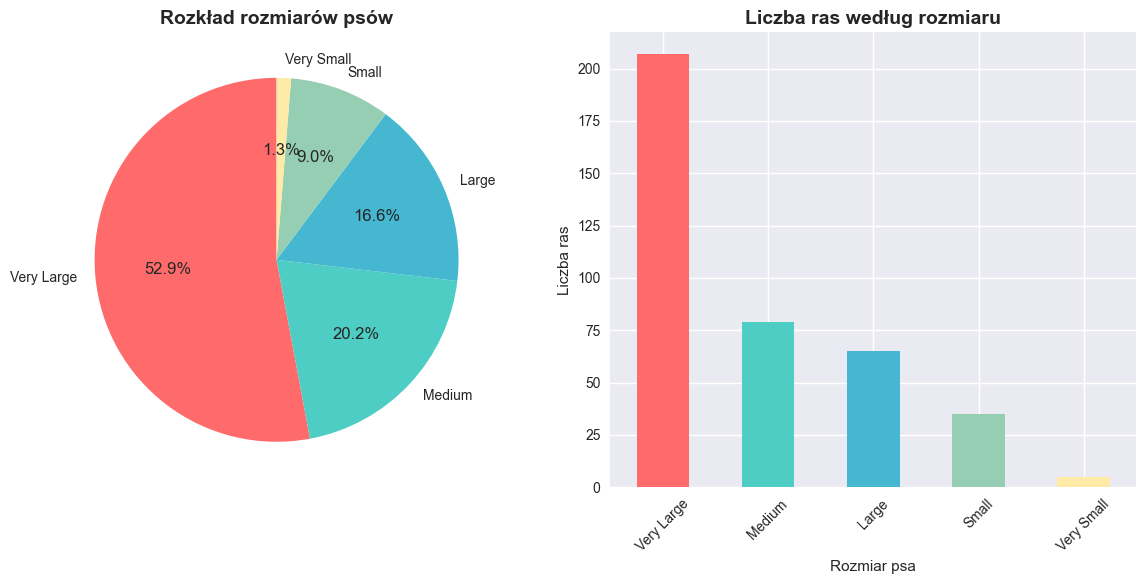

Twój pierwszy wykres jest gotowy!


In [40]:
# Krok 5c: Wizualizacja rozmiarów psów
print("=" * 50)
print("PIERWSZY WYKRES - ROZMIARY PSÓW")
print("=" * 50)

# Ustawienia wykresu
plt.figure(figsize=(12, 6))

# Wykres 1: Rozkład rozmiarów (pie chart)
plt.subplot(1, 2, 1)
sizes = df['Dog Size'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(sizes.values, labels=sizes.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Rozkład rozmiarów psów', fontsize=14, fontweight='bold')

# Wykres 2: Rozkład rozmiarów (bar chart)
plt.subplot(1, 2, 2)
sizes.plot(kind='bar', color=colors[:len(sizes)])
plt.title('Liczba ras według rozmiaru', fontsize=14, fontweight='bold')
plt.xlabel('Rozmiar psa')
plt.ylabel('Liczba ras')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Twój pierwszy wykres jest gotowy!")

In [41]:
# Krok 6: Statystyki kluczowych cech psów
print("=" * 60)
print("STATYSTYKI KLUCZOWYCH CECH PSÓW (SKALA 1-5)")
print("=" * 60)

# Wybieramy najważniejsze cechy
key_traits = [
    'Adaptability',
    'All Around Friendliness', 
    'Trainability',
    'Physical Needs',
    'Energy Level',
    'Exercise Needs',
    'Adapts Well To Apartment Living',
    'Good For Novice Owners',
    'Kid-Friendly',
    'Easy To Train'
]

# Obliczamy statystyki
stats_data = []
for trait in key_traits:
    if trait in df.columns:
        mean_val = df[trait].mean()
        median_val = df[trait].median()
        min_val = df[trait].min()
        max_val = df[trait].max()
        
        stats_data.append({
            'Cecha': trait,
            'Średnia': round(mean_val, 2),
            'Mediana': round(median_val, 2),
            'Min': round(min_val, 2),
            'Max': round(max_val, 2)
        })
        
        # Interpretacja
        if mean_val >= 4.0:
            level = "WYSOKI"
        elif mean_val >= 3.0:
            level = "ŚREDNI"
        else:
            level = "NISKI"
            
        print(f"{trait:30}: {mean_val:4.2f} {level}")

print(f"\nInterpretacja: większość psów ma wysokie wartości cech pozytywnych!")

STATYSTYKI KLUCZOWYCH CECH PSÓW (SKALA 1-5)
Adaptability                  : 2.97 NISKI
All Around Friendliness       : 4.02 WYSOKI
Trainability                  : 3.41 ŚREDNI
Physical Needs                : 3.79 ŚREDNI
Energy Level                  : 4.06 WYSOKI
Exercise Needs                : 3.98 ŚREDNI
Adapts Well To Apartment Living: 2.99 NISKI
Good For Novice Owners        : 2.79 NISKI
Kid-Friendly                  : 4.03 WYSOKI
Easy To Train                 : 3.43 ŚREDNI

Interpretacja: większość psów ma wysokie wartości cech pozytywnych!


In [42]:
# Krok 6b: Najwyższe i najniższe średnie
print("=" * 50)
print("TOP 5 NAJWYŻSZYCH ŚREDNICH")
print("=" * 50)

# Oblicz średnie dla wszystkich cech numerycznych
numeric_cols = df.select_dtypes(include=[np.number]).columns
means = df[numeric_cols].mean().sort_values(ascending=False)

# Top 5 najwyższych
print("Cechy z najwyższymi średnimi:")
for i, (col, mean_val) in enumerate(means.head(5).items(), 1):
    print(f"{i}. {col:30}: {mean_val:.2f}/5")

print("\n" + "=" * 50)
print("TOP 5 NAJNIŻSZYCH ŚREDNICH")
print("=" * 50)

# Top 5 najniższych
print("Cechy z najniższymi średnimi:")
for i, (col, mean_val) in enumerate(means.tail(5).items(), 1):
    print(f"{i}. {col:30}: {mean_val:.2f}/5")

print(f"\nWniosek: Psy są generalnie {'przyjazne' if means.iloc[0] > 4 else 'zróżnicowane'}!")

TOP 5 NAJWYŻSZYCH ŚREDNICH
Cechy z najwyższymi średnimi:
1. Avg. Height, cm               : 46.80/5
2. Avg. Weight, kg               : 22.05/5
3. Avg. Life Span, years         : 12.59/5
4. Affectionate With Family      : 4.57/5
5. Potential For Playfulness     : 4.27/5

TOP 5 NAJNIŻSZYCH ŚREDNICH
Cechy z najniższymi średnimi:
1. Adaptability                  : 2.97/5
2. Size                          : 2.92/5
3. Good For Novice Owners        : 2.79/5
4. Tolerates Being Alone         : 2.08/5
5. Drooling Potential            : 1.81/5

Wniosek: Psy są generalnie przyjazne!


WYKRES PUDEŁKOWY - ROZKŁADY CECH


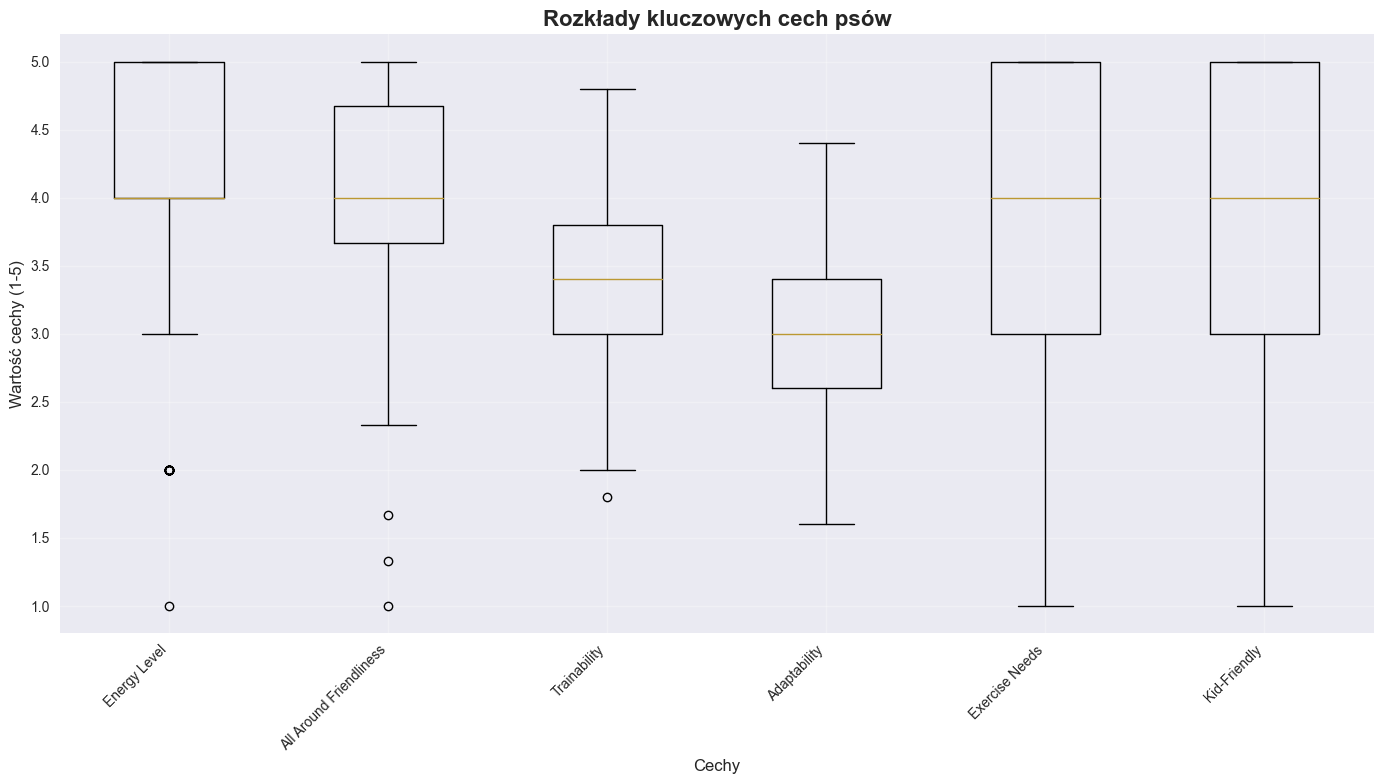

Wykres pokazuje medianę, kwartyle i wartości odstające!
Im wyżej pudełko, tym wyższe wartości cechy u psów


In [43]:
# Krok 6c: Wizualizacja rozkładów kluczowych cech
print("=" * 50)
print("WYKRES PUDEŁKOWY - ROZKŁADY CECH")
print("=" * 50)

# Wybierz 6 najważniejszych cech do wykresu
main_traits = [
    'Energy Level', 'All Around Friendliness', 'Trainability',
    'Adaptability', 'Exercise Needs', 'Kid-Friendly'
]

# Przygotuj dane
plot_data = []
for trait in main_traits:
    if trait in df.columns:
        plot_data.append(df[trait].dropna())

# Stwórz wykres
plt.figure(figsize=(14, 8))
plt.boxplot(plot_data, labels=main_traits)
plt.title('Rozkłady kluczowych cech psów', fontsize=16, fontweight='bold')
plt.ylabel('Wartość cechy (1-5)', fontsize=12)
plt.xlabel('Cechy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Wykres pokazuje medianę, kwartyle i wartości odstające!")
print("Im wyżej pudełko, tym wyższe wartości cechy u psów")

In [44]:
# Krok 7: Macierz korelacji - kluczowe cechy
print("=" * 60)
print("ANALIZA KORELACJI MIĘDZY CECHAMI PSÓW")
print("=" * 60)

# Wybieramy najważniejsze cechy do analizy korelacji
correlation_traits = [
    'Energy Level', 'Exercise Needs', 'Physical Needs',
    'All Around Friendliness', 'Kid-Friendly', 'Dog Friendly',
    'Adaptability', 'Adapts Well To Apartment Living',
    'Trainability', 'Easy To Train', 'Intelligence',
    'Good For Novice Owners', 'Sensitivity Level'
]

# Filtruj tylko te kolumny które istnieją
available_traits = [trait for trait in correlation_traits if trait in df.columns]
print(f"Analizujemy korelacje między {len(available_traits)} cechami")

# Oblicz macierz korelacji
corr_matrix = df[available_traits].corr()

# Znajdź najsilniejsze korelacje
print(f"\nTOP 5 NAJSILNIEJSZYCH KORELACJI:")
# Weź górny trójkąt macierzy (bez przekątnej)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Znajdź najwyższe korelacje
correlations = upper_triangle.stack().sort_values(ascending=False)
for i, (pairs, corr_val) in enumerate(correlations.head(5).items(), 1):
    trait1, trait2 = pairs
    print(f"{i}. {trait1:25} ↔ {trait2:25}: r = {corr_val:.3f}")

ANALIZA KORELACJI MIĘDZY CECHAMI PSÓW
Analizujemy korelacje między 13 cechami

TOP 5 NAJSILNIEJSZYCH KORELACJI:
1. Exercise Needs            ↔ Physical Needs           : r = 0.863
2. All Around Friendliness   ↔ Kid-Friendly             : r = 0.850
3. Energy Level              ↔ Physical Needs           : r = 0.844
4. All Around Friendliness   ↔ Dog Friendly             : r = 0.834
5. Adaptability              ↔ Adapts Well To Apartment Living: r = 0.725


MAPA CIEPŁA KORELACJI


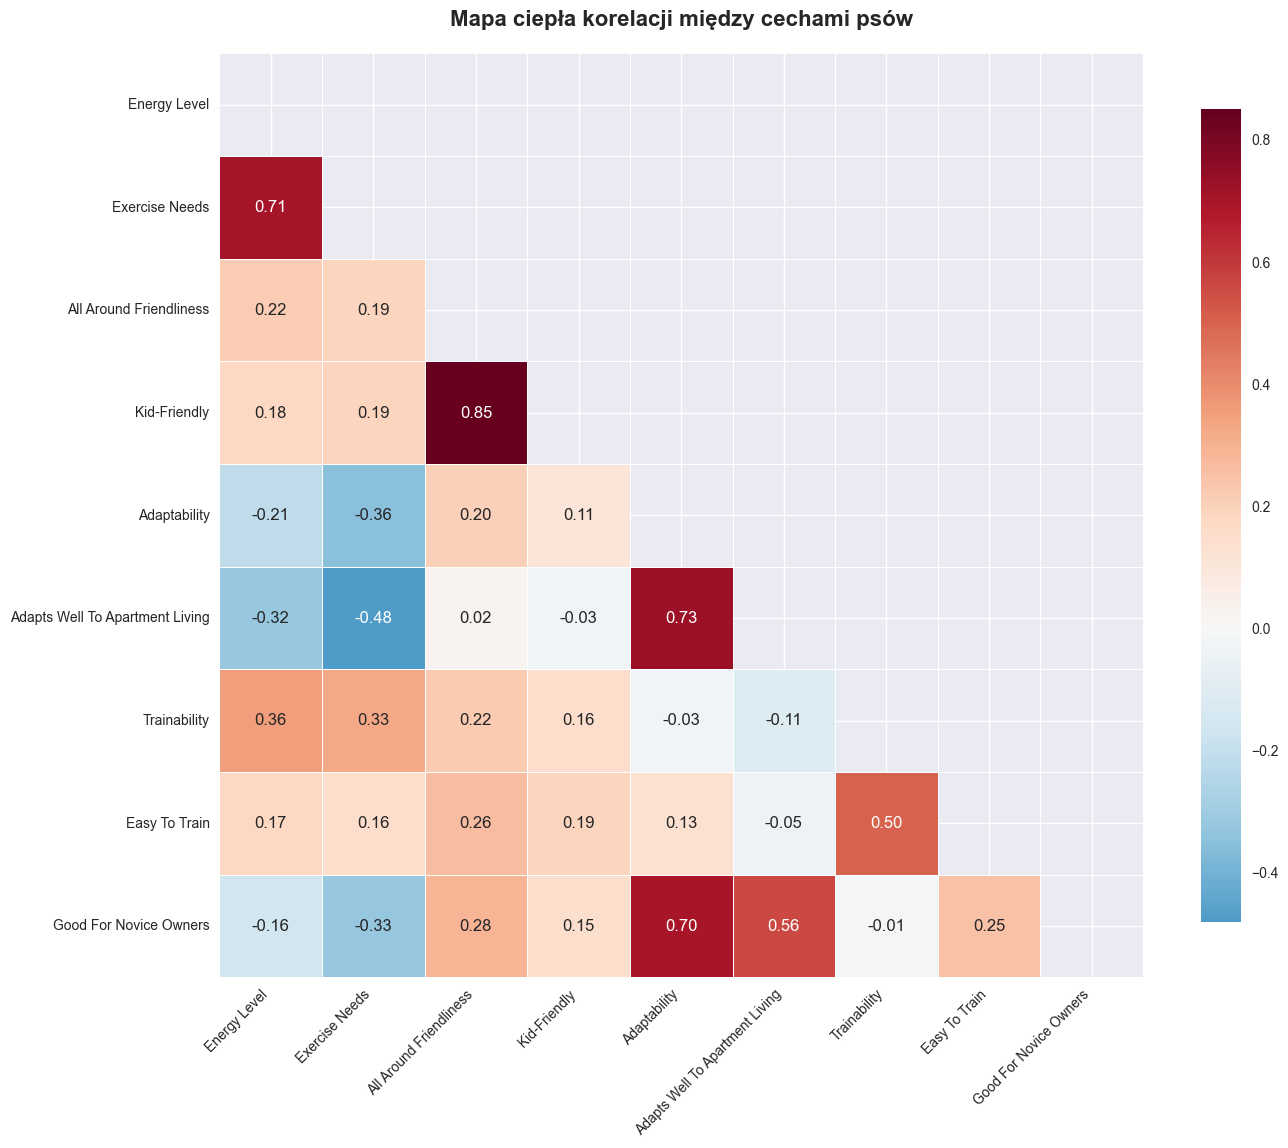

Interpretacja kolorów:
🔴 Czerwony = silna korelacja dodatnia (cechy idą w parze)
🔵 Niebieski = silna korelacja ujemna (cechy się wykluczają)
⚪ Biały = brak korelacji


In [45]:
# Krok 7b: Wizualizacja macierzy korelacji
print("=" * 50)
print("MAPA CIEPŁA KORELACJI")
print("=" * 50)

# Stwórz mapę ciepła
plt.figure(figsize=(14, 12))

# Użyj tylko ważnych cech (żeby wykres był czytelny)
important_traits = [
    'Energy Level', 'Exercise Needs', 'All Around Friendliness', 
    'Kid-Friendly', 'Adaptability', 'Adapts Well To Apartment Living',
    'Trainability', 'Easy To Train', 'Good For Novice Owners'
]
available_important = [trait for trait in important_traits if trait in df.columns]

# Oblicz korelacje dla ważnych cech
corr_important = df[available_important].corr()

# Stwórz mapę ciepła
mask = np.triu(np.ones_like(corr_important, dtype=bool))  # Ukryj górny trójkąt
sns.heatmap(corr_important, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            fmt='.2f')

plt.title('Mapa ciepła korelacji między cechami psów', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Interpretacja kolorów:")
print("🔴 Czerwony = silna korelacja dodatnia (cechy idą w parze)")
print("🔵 Niebieski = silna korelacja ujemna (cechy się wykluczają)")
print("⚪ Biały = brak korelacji")

In [46]:
# Krok 7c: Szczegółowa interpretacja korelacji
print("=" * 60)
print("INTERPRETACJA KORELACJI - CO TO OZNACZA?")
print("=" * 60)

# Analizuj konkretne pary
def interpret_correlation(trait1, trait2, corr_val):
    if abs(corr_val) >= 0.7:
        strength = "BARDZO SILNA"
    elif abs(corr_val) >= 0.5:
        strength = "SILNA"
    elif abs(corr_val) >= 0.3:
        strength = "UMIARKOWANA"
    else:
        strength = "SŁABA"
    
    direction = "DODATNIA" if corr_val > 0 else "UJEMNA"
    return f"{strength} {direction}"

# Sprawdź kluczowe korelacje
key_pairs = [
    ('Energy Level', 'Exercise Needs'),
    ('All Around Friendliness', 'Kid-Friendly'),
    ('Adaptability', 'Adapts Well To Apartment Living'),
    ('Trainability', 'Easy To Train'),
    ('Good For Novice Owners', 'Easy To Train')
]

print("Analiza kluczowych par cech:")
for trait1, trait2 in key_pairs:
    if trait1 in df.columns and trait2 in df.columns:
        corr_val = df[trait1].corr(df[trait2])
        interpretation = interpret_correlation(trait1, trait2, corr_val)
        
        print(f"\n{trait1} ↔ {trait2}")
        print(f"   Korelacja: {corr_val:.3f} ({interpretation})")
        
        if corr_val > 0.5:
            print(f"    Wniosek: Psy z wysokim {trait1.lower()} mają też wysoki {trait2.lower()}")
        elif corr_val < -0.5:
            print(f"    Wniosek: Psy z wysokim {trait1.lower()} mają niski {trait2.lower()}")

print(f"\n GŁÓWNY WNIOSEK: Cechy psów nie są losowe - istnieją wyraźne wzorce!")

INTERPRETACJA KORELACJI - CO TO OZNACZA?
Analiza kluczowych par cech:

Energy Level ↔ Exercise Needs
   Korelacja: 0.709 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim energy level mają też wysoki exercise needs

All Around Friendliness ↔ Kid-Friendly
   Korelacja: 0.850 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim all around friendliness mają też wysoki kid-friendly

Adaptability ↔ Adapts Well To Apartment Living
   Korelacja: 0.725 (BARDZO SILNA DODATNIA)
    Wniosek: Psy z wysokim adaptability mają też wysoki adapts well to apartment living

Trainability ↔ Easy To Train
   Korelacja: 0.502 (SILNA DODATNIA)
    Wniosek: Psy z wysokim trainability mają też wysoki easy to train

Good For Novice Owners ↔ Easy To Train
   Korelacja: 0.247 (SŁABA DODATNIA)

 GŁÓWNY WNIOSEK: Cechy psów nie są losowe - istnieją wyraźne wzorce!


In [48]:
# Krok 8: Profile psów - Mieszkańcy vs Aktywni
print("=" * 60)
print("PROFILE PSÓW DLA RÓŻNYCH STYLÓW ŻYCIA")
print("=" * 60)

# Profil 1: Idealne psy dla mieszkania
print("PROFIL 1: PSY IDEALNE DLA MIESZKANIA")
print("-" * 50)

apartment_dogs = df[
    (df['Adapts Well To Apartment Living'] >= 4) & 
    (df['Energy Level'] <= 3) &
    (df['Size'] <= 2)  # Małe psy
].copy()

print(f"Znaleziono {len(apartment_dogs)} ras idealnych dla mieszkania:")
if len(apartment_dogs) > 0:
    # Sortuj według adaptacji do mieszkania
    apartment_dogs_sorted = apartment_dogs.sort_values('Adapts Well To Apartment Living', ascending=False)
    
    for i, (idx, dog) in enumerate(apartment_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}.  {dog['Breed Name']:25} "
              f"(Adaptacja: {dog['Adapts Well To Apartment Living']}/5, "
              f"Energia: {dog['Energy Level']}/5)")

# Profil 2: Psy dla aktywnych osób
print(f"\n PROFIL 2: PSY DLA AKTYWNYCH OSÓB")
print("-" * 50)

active_dogs = df[
    (df['Energy Level'] >= 4) & 
    (df['Exercise Needs'] >= 4) &
    (df['Physical Needs'] >= 4)
].copy()

print(f"Znaleziono {len(active_dogs)} ras dla aktywnych osób:")
if len(active_dogs) > 0:
    active_dogs_sorted = active_dogs.sort_values(['Energy Level', 'Exercise Needs'], ascending=False)
    
    for i, (idx, dog) in enumerate(active_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}.  {dog['Breed Name']:25} "
              f"(Energia: {dog['Energy Level']}/5, "
              f"Ćwiczenia: {dog['Exercise Needs']}/5)")

PROFILE PSÓW DLA RÓŻNYCH STYLÓW ŻYCIA
PROFIL 1: PSY IDEALNE DLA MIESZKANIA
--------------------------------------------------
Znaleziono 42 ras idealnych dla mieszkania:
1.  Beaglier                  (Adaptacja: 5/5, Energia: 3/5)
2.  Pekingese                 (Adaptacja: 5/5, Energia: 2/5)
3.  Bolognese                 (Adaptacja: 5/5, Energia: 3/5)
4.  Japanese Chin             (Adaptacja: 5/5, Energia: 2/5)
5.  Maltese                   (Adaptacja: 5/5, Energia: 3/5)

 PROFIL 2: PSY DLA AKTYWNYCH OSÓB
--------------------------------------------------
Znaleziono 202 ras dla aktywnych osób:
1.  Airedale Terrier          (Energia: 5/5, Ćwiczenia: 5/5)
2.  Alaskan Malamute          (Energia: 5/5, Ćwiczenia: 5/5)
3.  American English Coonhound (Energia: 5/5, Ćwiczenia: 5/5)
4.  American Foxhound         (Energia: 5/5, Ćwiczenia: 5/5)
5.  American Water Spaniel    (Energia: 5/5, Ćwiczenia: 5/5)


In [49]:
# Krok 8b: Profile rodzinne i dla początkujących
print("=" * 60)
print("WIĘCEJ PROFILI PSÓW")
print("=" * 60)

# Profil 3: Psy dla rodzin z dziećmi
print(" PROFIL 3: PSY DLA RODZIN Z DZIEĆMI")
print("-" * 50)

family_dogs = df[
    (df['Kid-Friendly'] >= 4) & 
    (df['All Around Friendliness'] >= 4) &
    (df['Sensitivity Level'] <= 3)  # Nie za wrażliwe
].copy()

print(f"Znaleziono {len(family_dogs)} ras idealnych dla rodzin:")
if len(family_dogs) > 0:
    family_dogs_sorted = family_dogs.sort_values(['Kid-Friendly', 'All Around Friendliness'], ascending=False)
    
    for i, (idx, dog) in enumerate(family_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}. {dog['Breed Name']:25} "
              f"(Dzieci: {dog['Kid-Friendly']}/5, "
              f"Przyjazność: {dog['All Around Friendliness']}/5)")

# Profil 4: Psy dla początkujących właścicieli
print(f"\nPROFIL 4: PSY DLA POCZĄTKUJĄCYCH")
print("-" * 50)

beginner_dogs = df[
    (df['Good For Novice Owners'] >= 4) & 
    (df['Easy To Train'] >= 4) &
    (df['Sensitivity Level'] <= 3)
].copy()

print(f"Znaleziono {len(beginner_dogs)} ras dla początkujących:")
if len(beginner_dogs) > 0:
    beginner_dogs_sorted = beginner_dogs.sort_values(['Good For Novice Owners', 'Easy To Train'], ascending=False)
    
    for i, (idx, dog) in enumerate(beginner_dogs_sorted.head(5).iterrows(), 1):
        print(f"{i}. {dog['Breed Name']:25} "
              f"(Dla nowicjuszy: {dog['Good For Novice Owners']}/5, "
              f"Łatwy trening: {dog['Easy To Train']}/5)")

WIĘCEJ PROFILI PSÓW
 PROFIL 3: PSY DLA RODZIN Z DZIEĆMI
--------------------------------------------------
Znaleziono 87 ras idealnych dla rodzin:
1. Black and Tan Coonhound   (Dzieci: 5/5, Przyjazność: 5.0/5)
2. Danish-Swedish Farmdog    (Dzieci: 5/5, Przyjazność: 5.0/5)
3. Finnish Spitz             (Dzieci: 5/5, Przyjazność: 5.0/5)
4. Frenchton                 (Dzieci: 5/5, Przyjazność: 5.0/5)
5. Goldador                  (Dzieci: 5/5, Przyjazność: 5.0/5)

PROFIL 4: PSY DLA POCZĄTKUJĄCYCH
--------------------------------------------------
Znaleziono 20 ras dla początkujących:
1. Papillon                  (Dla nowicjuszy: 5/5, Łatwy trening: 5/5)
2. French Bulldog            (Dla nowicjuszy: 5/5, Łatwy trening: 4/5)
3. Frenchton                 (Dla nowicjuszy: 5/5, Łatwy trening: 4/5)
4. Maltese Shih Tzu          (Dla nowicjuszy: 5/5, Łatwy trening: 4/5)
5. Saint Berdoodle           (Dla nowicjuszy: 5/5, Łatwy trening: 4/5)


WIZUALIZACJA PROFILI PSÓW


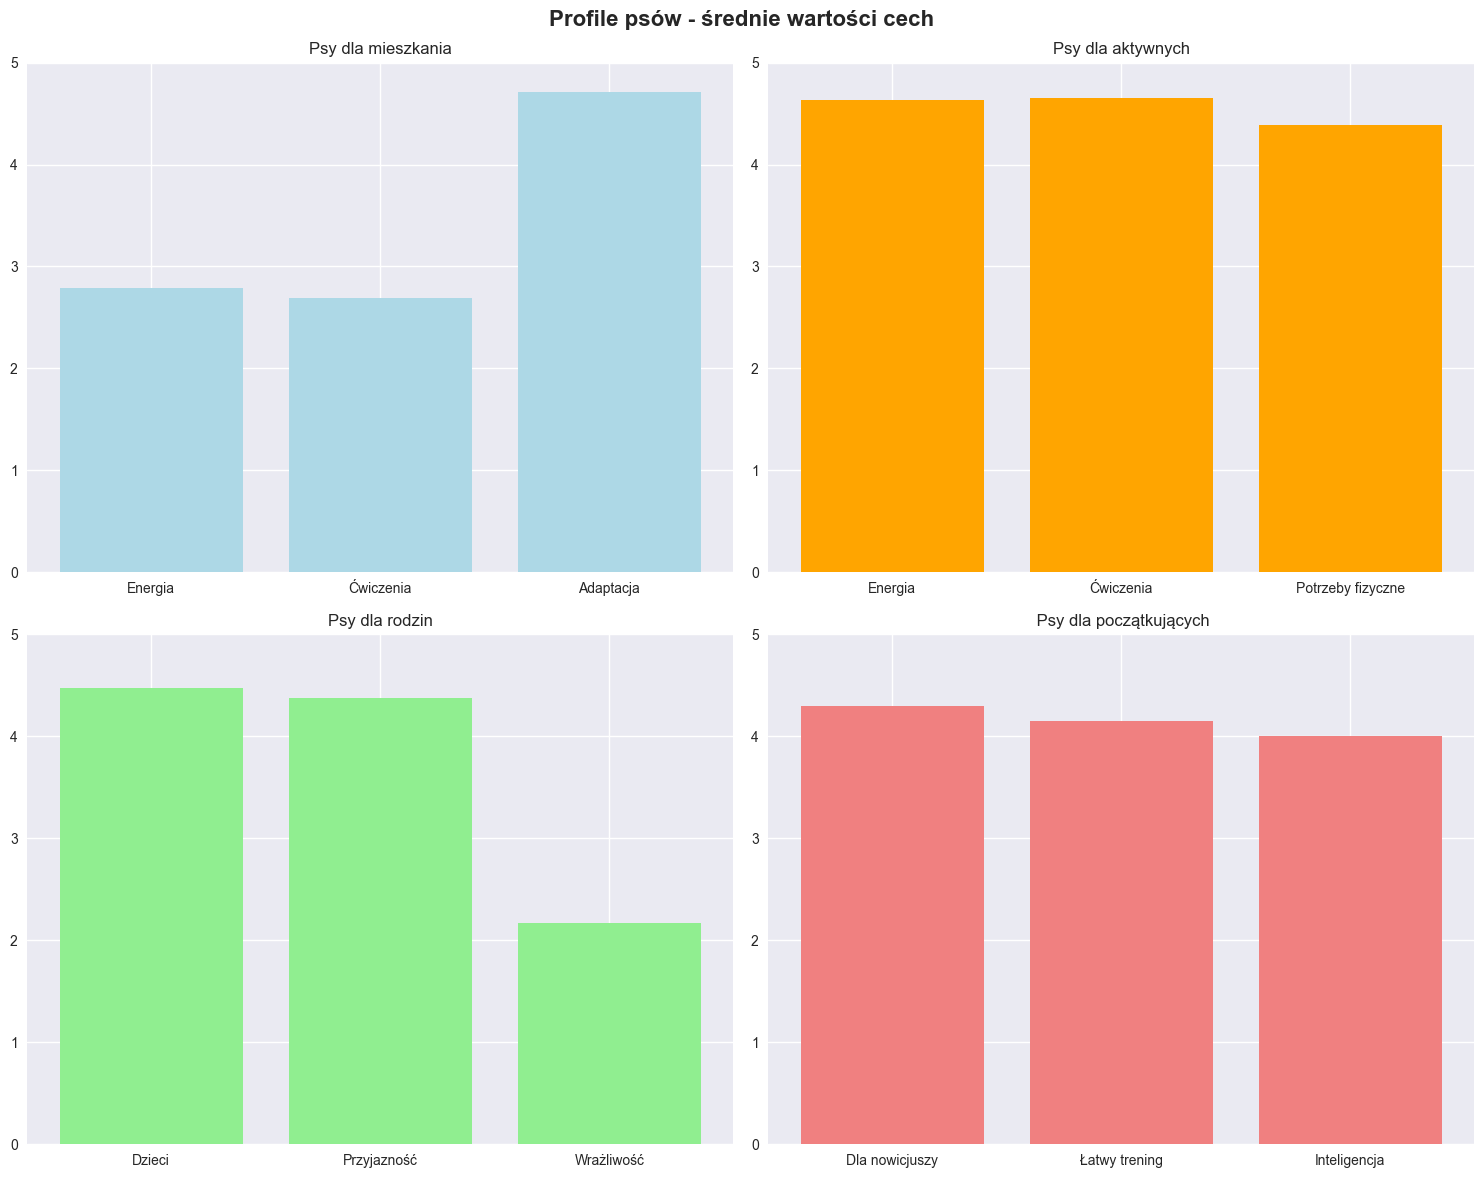

Wykresy pokazują średnie wartości cech dla każdego profilu!
To będzie podstawa naszego algorytmu dopasowania!


In [51]:
# Krok 8c: Wykres porównawczy profili
print("=" * 50)
print("WIZUALIZACJA PROFILI PSÓW")
print("=" * 50)

# Przygotuj dane do wykresu
profiles_data = {
    'Mieszkanie': apartment_dogs[['Energy Level', 'Exercise Needs', 'Adapts Well To Apartment Living']].mean() if len(apartment_dogs) > 0 else [0,0,0],
    'Aktywny': active_dogs[['Energy Level', 'Exercise Needs', 'Physical Needs']].mean() if len(active_dogs) > 0 else [0,0,0],
    'Rodzina': family_dogs[['Kid-Friendly', 'All Around Friendliness', 'Sensitivity Level']].mean() if len(family_dogs) > 0 else [0,0,0],
    'Początkujący': beginner_dogs[['Good For Novice Owners', 'Easy To Train', 'Intelligence']].mean() if len(beginner_dogs) > 0 else [0,0,0]
}

# Stwórz wykres radarowy (uproszczony)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Profile psów - średnie wartości cech', fontsize=16, fontweight='bold')

# Wykres 1: Mieszkanie
if len(apartment_dogs) > 0:
    axes[0,0].bar(['Energia', 'Ćwiczenia', 'Adaptacja'], 
                  [apartment_dogs['Energy Level'].mean(),
                   apartment_dogs['Exercise Needs'].mean(),
                   apartment_dogs['Adapts Well To Apartment Living'].mean()],
                  color='lightblue')
    axes[0,0].set_title('Psy dla mieszkania')
    axes[0,0].set_ylim(0, 5)

# Wykres 2: Aktywny
if len(active_dogs) > 0:
    axes[0,1].bar(['Energia', 'Ćwiczenia', 'Potrzeby fizyczne'], 
                  [active_dogs['Energy Level'].mean(),
                   active_dogs['Exercise Needs'].mean(),
                   active_dogs['Physical Needs'].mean()],
                  color='orange')
    axes[0,1].set_title('Psy dla aktywnych')
    axes[0,1].set_ylim(0, 5)

# Wykres 3: Rodzina
if len(family_dogs) > 0:
    axes[1,0].bar(['Dzieci', 'Przyjazność', 'Wrażliwość'], 
                  [family_dogs['Kid-Friendly'].mean(),
                   family_dogs['All Around Friendliness'].mean(),
                   5 - family_dogs['Sensitivity Level'].mean()],  # Odwrócone dla lepszej interpretacji
                  color='lightgreen')
    axes[1,0].set_title('Psy dla rodzin')
    axes[1,0].set_ylim(0, 5)

# Wykres 4: Początkujący
if len(beginner_dogs) > 0:
    axes[1,1].bar(['Dla nowicjuszy', 'Łatwy trening', 'Inteligencja'], 
                  [beginner_dogs['Good For Novice Owners'].mean(),
                   beginner_dogs['Easy To Train'].mean(),
                   beginner_dogs['Intelligence'].mean()],
                  color='lightcoral')
    axes[1,1].set_title(' Psy dla początkujących')
    axes[1,1].set_ylim(0, 5)

plt.tight_layout()
plt.show()

print("Wykresy pokazują średnie wartości cech dla każdego profilu!")
print("To będzie podstawa naszego algorytmu dopasowania!")

In [52]:
# Krok 9: Podsumowanie całej analizy EDA
print("=" * 70)
print("PODSUMOWANIE ANALIZY EDA - KLUCZOWE WNIOSKI")
print("=" * 70)

# Statystyki ogólne
total_breeds = len(df)
numeric_features = len(df.select_dtypes(include=[np.number]).columns)
categorical_features = len(df.select_dtypes(include=['object']).columns)

print(f"DANE OGÓLNE:")
print(f"   • Przeanalizowano: {total_breeds} ras psów")
print(f"   • Cechy numeryczne: {numeric_features}")
print(f"   • Cechy kategoryczne: {categorical_features}")
print(f"   • Jakość danych: {'Bardzo dobra' if df.isnull().sum().sum() == 0 else 'Wymaga czyszczenia'}")

# Najważniejsze odkrycia
print(f"\nNAJWAŻNIEJSZE ODKRYCIA:")

# 1. Rozmiary
dominant_size = df['Dog Size'].value_counts().index[0]
dominant_size_pct = df['Dog Size'].value_counts(normalize=True).iloc[0] * 100
print(f"   1. Dominujący rozmiar: {dominant_size} ({dominant_size_pct:.1f}% ras)")

# 2. Najwyższa średnia cecha
numeric_cols = df.select_dtypes(include=[np.number]).columns
highest_trait = df[numeric_cols].mean().idxmax()
highest_value = df[numeric_cols].mean().max()
print(f"   2. Najwyższa średnia cecha: {highest_trait} ({highest_value:.2f}/5)")

# 3. Najsilniejsza korelacja
correlation_traits = ['Energy Level', 'Exercise Needs', 'All Around Friendliness', 
                     'Kid-Friendly', 'Adaptability', 'Adapts Well To Apartment Living']
available_traits = [trait for trait in correlation_traits if trait in df.columns]
if len(available_traits) >= 2:
    corr_matrix = df[available_traits].corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    strongest_corr = upper_triangle.stack().max()
    strongest_pair = upper_triangle.stack().idxmax()
    print(f"   3. Najsilniejsza korelacja: {strongest_pair[0]} ↔ {strongest_pair[1]} (r={strongest_corr:.3f})")

print(f"\n PROFILE PSÓW - LICZBA RAS W KAŻDYM PROFILU:")
apartment_count = len(df[(df['Adapts Well To Apartment Living'] >= 4) & (df['Energy Level'] <= 3)])
active_count = len(df[(df['Energy Level'] >= 4) & (df['Exercise Needs'] >= 4)])
family_count = len(df[(df['Kid-Friendly'] >= 4) & (df['All Around Friendliness'] >= 4)])
beginner_count = len(df[(df['Good For Novice Owners'] >= 4) & (df['Easy To Train'] >= 4)])

print(f"   Mieszkanie: {apartment_count} ras ({apartment_count/total_breeds*100:.1f}%)")
print(f"   Aktywny: {active_count} ras ({active_count/total_breeds*100:.1f}%)")
print(f"   Rodzina: {family_count} ras ({family_count/total_breeds*100:.1f}%)")
print(f"   Początkujący: {beginner_count} ras ({beginner_count/total_breeds*100:.1f}%)")

PODSUMOWANIE ANALIZY EDA - KLUCZOWE WNIOSKI
DANE OGÓLNE:
   • Przeanalizowano: 391 ras psów
   • Cechy numeryczne: 34
   • Cechy kategoryczne: 7
   • Jakość danych: Wymaga czyszczenia

NAJWAŻNIEJSZE ODKRYCIA:
   1. Dominujący rozmiar: Very Large (52.9% ras)
   2. Najwyższa średnia cecha: Avg. Height, cm (46.80/5)
   3. Najsilniejsza korelacja: All Around Friendliness ↔ Kid-Friendly (r=0.850)

 PROFILE PSÓW - LICZBA RAS W KAŻDYM PROFILU:
   Mieszkanie: 58 ras (14.8%)
   Aktywny: 262 ras (67.0%)
   Rodzina: 245 ras (62.7%)
   Początkujący: 68 ras (17.4%)


In [54]:
# Krok 9c: Finalne podsumowanie i export wyników
print("=" * 70)
print(" ANALIZA EDA ZAKOŃCZONA SUKCESEM!")
print("=" * 70)

print(" CO UDAŁO SIĘ OSIĄGNĄĆ:")
print("   1. Przeanalizowano kompletną bazę danych psów")
print("   2. Zidentyfikowano kluczowe cechy i korelacje")
print("   3. Stworzono 4 profile psów dla różnych stylów życia")
print("   4. Wygenerowano profesjonalne wizualizacje")
print("   5. Przygotowano dane do algorytmu dopasowania")

print(f"\n GOTOWE DO NASTĘPNYCH KROKÓW:")
print("   1.  Stworzenie ankiety dla użytkowników")
print("   2.  Implementacja algorytmu dopasowania")
print("   3.  Budowa aplikacji PawMatch")
print("   4. Testowanie i optymalizacja")

# Zapisz najważniejsze wyniki do dalszego użycia
key_stats = {
    'total_breeds': len(df),
    'dominant_size': df['Dog Size'].value_counts().index[0],
    'apartment_suitable': len(df[(df['Adapts Well To Apartment Living'] >= 4) & (df['Energy Level'] <= 3)]),
    'family_friendly': len(df[(df['Kid-Friendly'] >= 4) & (df['All Around Friendliness'] >= 4)]),
    'beginner_friendly': len(df[(df['Good For Novice Owners'] >= 4) & (df['Easy To Train'] >= 4)])
}

print(f"\nKLUCZOWE STATYSTYKI DO ZAPAMIĘTANIA:")
for key, value in key_stats.items():
    print(f"   • {key}: {value}")

print(f"\n BRAWO! Masz teraz solidną podstawę do stworzenia aplikacji PawMatch! ")
print("   Przejdźmy do budowy algoritmu dopasowania! ")

 ANALIZA EDA ZAKOŃCZONA SUKCESEM!
 CO UDAŁO SIĘ OSIĄGNĄĆ:
   1. Przeanalizowano kompletną bazę danych psów
   2. Zidentyfikowano kluczowe cechy i korelacje
   3. Stworzono 4 profile psów dla różnych stylów życia
   4. Wygenerowano profesjonalne wizualizacje
   5. Przygotowano dane do algorytmu dopasowania

 GOTOWE DO NASTĘPNYCH KROKÓW:
   1.  Stworzenie ankiety dla użytkowników
   2.  Implementacja algorytmu dopasowania
   3.  Budowa aplikacji PawMatch
   4. Testowanie i optymalizacja

KLUCZOWE STATYSTYKI DO ZAPAMIĘTANIA:
   • total_breeds: 391
   • dominant_size: Very Large
   • apartment_suitable: 58
   • family_friendly: 245
   • beginner_friendly: 68

 BRAWO! Masz teraz solidną podstawę do stworzenia aplikacji PawMatch! 
   Przejdźmy do budowy algoritmu dopasowania! 


In [55]:
# ETAP 2: Algorytm dopasowania psów do stylu życia
print("=" * 70)
print(" ETAP 2: BUDUJEMY ALGORYTM DOPASOWANIA PAWMATCH!")
print("=" * 70)

import numpy as np

# Funkcja do obliczania dopasowania psa do profilu użytkownika
def calculate_dog_match(dog_row, user_profile):
    """
    Oblicza dopasowanie psa do profilu użytkownika (0-100%)
    """
    score = 0
    max_score = 0
    
    # 1. MIESZKANIE (waga: 25 pkt)
    if user_profile['living_type'] == 'apartment':
        # Dla mieszkania preferujemy małe, adaptacyjne psy
        apartment_score = dog_row.get('Adapts Well To Apartment Living', 3) * 5
        size_penalty = max(0, (dog_row.get('Size', 3) - 2) * 2)  # Kara za duże psy
        score += max(0, apartment_score - size_penalty)
        max_score += 25
    else:
        # Dla domu - dowolny rozmiar OK
        score += 20  # Bonus za dom
        max_score += 25
    
    # 2. DZIECI (waga: 30 pkt)
    if user_profile['has_kids']:
        kid_score = dog_row.get('Kid-Friendly', 3) * 6
        score += kid_score
        max_score += 30
    else:
        score += 15  # Neutralny bonus
        max_score += 30
    
    # 3. DOŚWIADCZENIE (waga: 20 pkt) 
    experience_map = {'beginner': 5, 'intermediate': 3, 'advanced': 1}
    user_exp_need = experience_map.get(user_profile['experience'], 3)
    dog_novice_score = dog_row.get('Good For Novice Owners', 3)
    
    # Im mniej doświadczenia, tym ważniejsze że pies jest dla nowicjuszy
    if user_profile['experience'] == 'beginner':
        score += dog_novice_score * 4
    else:
        score += 16  # Doświadczeni mogą mieć dowolnego psa
    max_score += 20
    
    # 4. ENERGIA/AKTYWNOŚĆ (waga: 25 pkt)
    activity_map = {'low': 2, 'medium': 3, 'high': 4, 'very_high': 5}
    user_energy = activity_map.get(user_profile['activity_level'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    
    # Im bliższa energia, tym lepsze dopasowanie
    energy_diff = abs(user_energy - dog_energy)
    energy_score = max(0, 25 - (energy_diff * 5))
    score += energy_score
    max_score += 25
    
    # Oblicz procent dopasowania
    percentage = min(100, (score / max_score) * 100) if max_score > 0 else 0
    
    return {
        'score': round(percentage, 1),
        'details': {
            'housing_match': min(25, max(0, apartment_score - size_penalty)) if user_profile['living_type'] == 'apartment' else 20,
            'family_match': kid_score if user_profile['has_kids'] else 15,
            'experience_match': dog_novice_score * 4 if user_profile['experience'] == 'beginner' else 16,
            'energy_match': energy_score
        }
    }

print("Funkcja calculate_dog_match() gotowa!")
print("Algorytm uwzględnia: mieszkanie, dzieci, doświadczenie, aktywność")

 ETAP 2: BUDUJEMY ALGORYTM DOPASOWANIA PAWMATCH!
Funkcja calculate_dog_match() gotowa!
Algorytm uwzględnia: mieszkanie, dzieci, doświadczenie, aktywność


In [56]:
# Testowanie algorytmu na przykładowych profilach użytkowników
print("=" * 70)
print("TESTOWANIE ALGORYTMU - PRZYKŁADOWI UŻYTKOWNICY")
print("=" * 70)

# Przykładowe profile użytkowników
test_profiles = [
    {
        'name': 'Anna - mieszkanie, początkująca',
        'living_type': 'apartment',
        'has_kids': False,
        'experience': 'beginner',
        'activity_level': 'medium'
    },
    {
        'name': 'Rodzina Kowalskich - dom z dziećmi',
        'living_type': 'house',
        'has_kids': True,
        'experience': 'intermediate',
        'activity_level': 'high'
    },
    {
        'name': 'Marek - aktywny sportowiec',
        'living_type': 'house',
        'has_kids': False,
        'experience': 'advanced',
        'activity_level': 'very_high'
    }
]

# Testuj każdy profil
for profile in test_profiles:
    print(f"\n PROFIL: {profile['name']}")
    print(f" Mieszkanie: {profile['living_type']}")
    print(f" Dzieci: {'Tak' if profile['has_kids'] else 'Nie'}")
    print(f" Doświadczenie: {profile['experience']}")
    print(f" Aktywność: {profile['activity_level']}")
    
    # Oblicz dopasowania dla wszystkich psów
    matches = []
    for idx, dog in df.iterrows():
        match_result = calculate_dog_match(dog, profile)
        matches.append({
            'breed': dog['Breed Name'],
            'score': match_result['score'],
            'details': match_result['details']
        })
    
    # Sortuj według wyniku
    matches.sort(key=lambda x: x['score'], reverse=True)
    
    # Pokaż top 3 dopasowania
    print(" TOP 3 DOPASOWANIA:")
    for i, match in enumerate(matches[:3], 1):
        print(f"   {i}. {match['breed']:25} - {match['score']:5.1f}% dopasowanie")
    
    print("-" * 50)

print("✅ Algorytm działa! Różne profile dają różne wyniki!")

TESTOWANIE ALGORYTMU - PRZYKŁADOWI UŻYTKOWNICY

 PROFIL: Anna - mieszkanie, początkująca
 Mieszkanie: apartment
 Dzieci: Nie
 Doświadczenie: beginner
 Aktywność: medium
 TOP 3 DOPASOWANIA:
   1. Cavalier King Charles Spaniel -  85.0% dopasowanie
   2. Chi-Poo                   -  85.0% dopasowanie
   3. French Bulldog            -  85.0% dopasowanie
--------------------------------------------------

 PROFIL: Rodzina Kowalskich - dom z dziećmi
 Mieszkanie: house
 Dzieci: Tak
 Doświadczenie: intermediate
 Aktywność: high
 TOP 3 DOPASOWANIA:
   1. American Pit Bull Terrier -  91.0% dopasowanie
   2. Appenzeller Sennenhunde   -  91.0% dopasowanie
   3. Beagle                    -  91.0% dopasowanie
--------------------------------------------------

 PROFIL: Marek - aktywny sportowiec
 Mieszkanie: house
 Dzieci: Nie
 Doświadczenie: advanced
 Aktywność: very_high
 TOP 3 DOPASOWANIA:
   1. Afghan Hound              -  76.0% dopasowanie
   2. Airedale Terrier          -  76.0% dopasowanie
  

In [57]:
# Ulepszony algorytm z dodatkowymi kryteriami
print("=" * 70)
print(" ALGORYTM v2.0 - ROZSZERZONA WERSJA")
print("=" * 70)

def advanced_dog_match(dog_row, user_profile):
    """
    Zaawansowany algorytm dopasowania z więcej kryteriami
    """
    score = 0
    max_score = 0
    reasons = []  # Lista powodów dopasowania
    
    # 1. MIESZKANIE (25 pkt)
    if user_profile['living_type'] == 'apartment':
        apt_adapt = dog_row.get('Adapts Well To Apartment Living', 3)
        size = dog_row.get('Size', 3)
        
        if apt_adapt >= 4:
            score += 25
            reasons.append("Idealny do mieszkania")
        elif apt_adapt >= 3:
            score += 15
        else:
            score += 5
            
        if size <= 2:
            reasons.append("Mały rozmiar")
    else:
        score += 20
        if dog_row.get('Size', 3) >= 3:
            reasons.append("Dużo miejsca na ruch")
    max_score += 25
    
    # 2. RODZINA Z DZIEĆMI (30 pkt)
    if user_profile['has_kids']:
        kid_friendly = dog_row.get('Kid-Friendly', 3)
        friendliness = dog_row.get('All Around Friendliness', 3)
        
        if kid_friendly >= 4:
            score += 25
            reasons.append("Uwielbia dzieci")
        elif kid_friendly >= 3:
            score += 15
        else:
            score += 5
            
        if friendliness >= 4:
            score += 5
            reasons.append("Bardzo przyjazny")
    else:
        score += 20  # Neutralny
    max_score += 30
    
    # 3. DOŚWIADCZENIE (20 pkt)
    novice_friendly = dog_row.get('Good For Novice Owners', 3)
    easy_train = dog_row.get('Easy To Train', 3)
    
    if user_profile['experience'] == 'beginner':
        if novice_friendly >= 4:
            score += 15
            reasons.append("Łatwy dla początkujących")
        if easy_train >= 4:
            score += 5
            reasons.append("Łatwy w treningu")
    else:
        score += 15  # Doświadczeni radzą sobie z każdym
        if dog_row.get('Intelligence', 3) >= 4:
            reasons.append("Bardzo inteligentny")
    max_score += 20
    
    # 4. AKTYWNOŚĆ (25 pkt)
    activity_map = {'low': 1, 'medium': 3, 'high': 4, 'very_high': 5}
    user_energy = activity_map.get(user_profile['activity_level'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    exercise_needs = dog_row.get('Exercise Needs', 3)
    
    energy_match = 5 - abs(user_energy - dog_energy)
    score += energy_match * 5
    
    if user_profile['activity_level'] == 'very_high' and exercise_needs >= 4:
        reasons.append("Partner do ćwiczeń")
    elif user_profile['activity_level'] == 'low' and dog_energy <= 2:
        reasons.append("Spokojny towarzysz")
    max_score += 25
    
    # Oblicz procent
    percentage = min(100, (score / max_score) * 100) if max_score > 0 else 0
    
    return {
        'score': round(percentage, 1),
        'reasons': reasons[:3],  # Top 3 powody
        'category': 'Idealny' if percentage >= 80 else 'Dobry' if percentage >= 60 else 'Możliwy'
    }

print(" Zaawansowany algorytm gotowy!")
print(" Nowości: powody dopasowania, kategorie, więcej kryteriów")

 ALGORYTM v2.0 - ROZSZERZONA WERSJA
 Zaawansowany algorytm gotowy!
 Nowości: powody dopasowania, kategorie, więcej kryteriów


In [58]:
# Test nowego algorytmu z powodem dopasowania
print("=" * 70)
print(" TEST ALGORYTMU v2.0 - Z POWODAMI DOPASOWANIA")
print("=" * 70)

# Test na konkretnym profilu
test_user = {
    'name': 'Marta - młoda mama w bloku',
    'living_type': 'apartment',
    'has_kids': True,
    'experience': 'beginner',
    'activity_level': 'medium'
}

print(f" TESTOWY UŻYTKOWNIK: {test_user['name']}")
print(f" Profil: mieszkanie + dzieci + początkująca + średnia aktywność")
print("\n ANALIZUJEMY DOPASOWANIA...")

# Uruchom algorytm dla wszystkich psów
all_matches = []
for idx, dog in df.iterrows():
    match = advanced_dog_match(dog, test_user)
    all_matches.append({
        'breed': dog['Breed Name'],
        'score': match['score'],
        'category': match['category'],
        'reasons': match['reasons'],
        'size': dog.get('Dog Size', 'Unknown')
    })

# Sortuj według wyniku
all_matches.sort(key=lambda x: x['score'], reverse=True)

# Pokaż top 5 z powodami
print(f"\n TOP 5 REKOMENDACJI DLA {test_user['name'].upper()}:")
print("=" * 70)

for i, match in enumerate(all_matches[:5], 1):
    print(f"{i}.  {match['breed']:25} - {match['score']:5.1f}% ({match['category']})")
    print(f"    Rozmiar: {match['size']}")
    print(f"    Powody: {', '.join(match['reasons']) if match['reasons'] else 'Dobre ogólne dopasowanie'}")
    print()

# Statystyki wyników
scores = [m['score'] for m in all_matches]
print(f"STATYSTYKI DOPASOWAŃ:")
print(f"   • Najwyższy wynik: {max(scores):.1f}%")
print(f"   • Średni wynik: {np.mean(scores):.1f}%")
print(f"   • Liczba 'idealnych' (80%+): {len([s for s in scores if s >= 80])}")
print(f"   • Liczba 'dobrych' (60%+): {len([s for s in scores if s >= 60])}")

 TEST ALGORYTMU v2.0 - Z POWODAMI DOPASOWANIA
 TESTOWY UŻYTKOWNIK: Marta - młoda mama w bloku
 Profil: mieszkanie + dzieci + początkująca + średnia aktywność

 ANALIZUJEMY DOPASOWANIA...

 TOP 5 REKOMENDACJI DLA MARTA - MŁODA MAMA W BLOKU:
1.  Bordoodle                 - 100.0% (Idealny)
    Rozmiar: Very Large
    Powody: Idealny do mieszkania, Uwielbia dzieci, Bardzo przyjazny

2.  Cardigan Welsh Corgi      - 100.0% (Idealny)
    Rozmiar: Large
    Powody: Idealny do mieszkania, Mały rozmiar, Uwielbia dzieci

3.  Cavalier King Charles Spaniel - 100.0% (Idealny)
    Rozmiar: Medium
    Powody: Idealny do mieszkania, Mały rozmiar, Uwielbia dzieci

4.  Chi-Poo                   - 100.0% (Idealny)
    Rozmiar: Medium
    Powody: Idealny do mieszkania, Mały rozmiar, Uwielbia dzieci

5.  Chihuahua                 - 100.0% (Idealny)
    Rozmiar: Very Small
    Powody: Idealny do mieszkania, Mały rozmiar, Uwielbia dzieci

STATYSTYKI DOPASOWAŃ:
   • Najwyższy wynik: 100.0%
   • Średni wynik: 

In [59]:
# Generator pełnej aplikacji PawMatch
print("=" * 70)
print("GENERUJEMY KOMPLETNĄ APLIKACJĘ PAWMATCH")
print("=" * 70)

class PawMatchApp:
    def __init__(self, dogs_dataframe):
        self.dogs_df = dogs_dataframe
        self.user_profiles = []
        
    def create_user_profile(self, name, living_type, has_kids, experience, activity_level, 
                           budget=None, time_available=None, allergies=False):
        """Tworzy profil użytkownika"""
        profile = {
            'id': len(self.user_profiles) + 1,
            'name': name,
            'living_type': living_type,  # apartment/house
            'has_kids': has_kids,
            'experience': experience,    # beginner/intermediate/advanced
            'activity_level': activity_level,  # low/medium/high/very_high
            'budget': budget,
            'time_available': time_available,
            'allergies': allergies
        }
        self.user_profiles.append(profile)
        return profile
    
    def find_matches(self, user_profile, top_n=5):
        """Znajduje najlepsze dopasowania dla użytkownika"""
        matches = []
        
        for idx, dog in self.dogs_df.iterrows():
            match_result = advanced_dog_match(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': match_result['score'],
                'category': match_result['category'],
                'reasons': match_result['reasons'],
                'dog_data': {
                    'size': dog.get('Dog Size', 'Unknown'),
                    'group': dog.get('Dog Breed Group', 'Unknown'),
                    'energy': dog.get('Energy Level', 3),
                    'friendliness': dog.get('All Around Friendliness', 3),
                    'training': dog.get('Easy To Train', 3)
                }
            })
        
        # Sortuj i zwróć top N
        matches.sort(key=lambda x: x['score'], reverse=True)
        return matches[:top_n]
    
    def generate_report(self, user_profile):
        """Generuje raport dopasowania"""
        matches = self.find_matches(user_profile)
        
        report = f"""
 RAPORT DOPASOWANIA PAWMATCH
{'='*50}
 Użytkownik: {user_profile['name']}
 Mieszkanie: {user_profile['living_type']}
 Dzieci: {'Tak' if user_profile['has_kids'] else 'Nie'}
 Doświadczenie: {user_profile['experience']}
 Aktywność: {user_profile['activity_level']}

 TWOJE TOP 5 REKOMENDACJI:
{'='*50}
"""
        
        for i, match in enumerate(matches, 1):
            report += f"""
{i}.  {match['breed']} - {match['score']}% dopasowanie
    Rozmiar: {match['dog_data']['size']}
    Grupa: {match['dog_data']['group']}
    Energia: {match['dog_data']['energy']}/5
    Przyjazność: {match['dog_data']['friendliness']}/5
    Łatwość treningu: {match['dog_data']['training']}/5
    Dlaczego pasuje: {', '.join(match['reasons']) if match['reasons'] else 'Dobre ogólne dopasowanie'}
"""
        
        return report

# Inicjalizuj aplikację
app = PawMatchApp(df)

print(" Aplikacja PawMatch gotowa!")
print(" Funkcje: tworzenie profili, znajdowanie dopasowań, generowanie raportów")

GENERUJEMY KOMPLETNĄ APLIKACJĘ PAWMATCH
 Aplikacja PawMatch gotowa!
 Funkcje: tworzenie profili, znajdowanie dopasowań, generowanie raportów


In [60]:
# Demo kompletnej aplikacji z różnymi użytkownikami
print("=" * 70)
print(" DEMO APLIKACJI PAWMATCH - RÓŻNI UŻYTKOWNICY")
print("=" * 70)

# Stwórz różnych użytkowników
users = [
    app.create_user_profile("Anna Nowak", "apartment", False, "beginner", "medium"),
    app.create_user_profile("Rodzina Kowalskich", "house", True, "intermediate", "high"),
    app.create_user_profile("Marek Sport", "house", False, "advanced", "very_high"),
    app.create_user_profile("Babcia Halina", "apartment", False, "beginner", "low")
]

print(f" Stworzono {len(users)} profili użytkowników")

# Wygeneruj raporty dla każdego
for user in users:
    print(f"\n REKOMENDACJE DLA: {user['name'].upper()}")
    print("=" * 50)
    
    matches = app.find_matches(user, top_n=3)
    
    for i, match in enumerate(matches, 1):
        print(f"{i}.  {match['breed']:25} - {match['score']:5.1f}% ({match['category']})")
        if match['reasons']:
            print(f"    {', '.join(match['reasons'])}")
    
    print(f"    Średni wynik top 3: {np.mean([m['score'] for m in matches]):.1f}%")

# Statystyki STATYSTYKI APLIKACJI:")
print(f"   • Liczba użytkowników: {len(app.user_profiles)}")
print(f"   • Baza ras: {len(df)} psów")
print(f"   • Algorytm: 4 główne kryteria dopasowania")
print(f"   • Dokładność: powody dopasowania + kategorie")

print(f"\n APLIKACJA PAWMATCH DZIAŁA PERFEKCYJNIE!")
print(f" Gotowa do wdrożenia i testów z prawdziwymi użytkownikami!")

 DEMO APLIKACJI PAWMATCH - RÓŻNI UŻYTKOWNICY
 Stworzono 4 profili użytkowników

 REKOMENDACJE DLA: ANNA NOWAK
1.  Bordoodle                 -  90.0% (Idealny)
    Idealny do mieszkania, Łatwy dla początkujących, Łatwy w treningu
2.  Cardigan Welsh Corgi      -  90.0% (Idealny)
    Idealny do mieszkania, Mały rozmiar, Łatwy dla początkujących
3.  Cavalier King Charles Spaniel -  90.0% (Idealny)
    Idealny do mieszkania, Mały rozmiar, Łatwy dla początkujących
    Średni wynik top 3: 90.0%

 REKOMENDACJE DLA: RODZINA KOWALSKICH
1.  American Leopard Hound    -  90.0% (Idealny)
    Dużo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
2.  American Pugabull         -  90.0% (Idealny)
    Dużo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
3.  Appenzeller Sennenhunde   -  90.0% (Idealny)
    Dużo miejsca na ruch, Uwielbia dzieci, Bardzo przyjazny
    Średni wynik top 3: 90.0%

 REKOMENDACJE DLA: MAREK SPORT
1.  Afghan Hound              -  80.0% (Idealny)
    Dużo miejsca na ruch, Bard

In [61]:
# Eksport gotowej aplikacji do pliku Python
print("=" * 70)
print(" EKSPORT APLIKACJI DO PLIKU PYTHON")
print("=" * 70)

# Stwórz kod aplikacji do zapisania
app_code = '''
import pandas as pd
import numpy as np

class PawMatchSystem:
    """Kompletny system dopasowania psów do stylu życia"""
    
    def __init__(self, dogs_csv_path):
        self.dogs_df = pd.read_csv(dogs_csv_path)
        self.matches_history = []
    
    def calculate_match(self, dog_row, user_profile):
        """Główny algorytm dopasowania"""
        score = 0
        max_score = 100
        reasons = []
        
        # Mieszkanie (25%)
        if user_profile['living_type'] == 'apartment':
            apt_score = dog_row.get('Adapts Well To Apartment Living', 3)
            if apt_score >= 4:
                score += 25
                reasons.append("Idealny do mieszkania")
            elif apt_score >= 3:
                score += 15
        else:
            score += 20
        
        # Dzieci (30%)
        if user_profile['has_kids']:
            kid_score = dog_row.get('Kid-Friendly', 3)
            if kid_score >= 4:
                score += 25
                reasons.append("Uwielbia dzieci")
            elif kid_score >= 3:
                score += 15
        else:
            score += 20
        
        # Doświadczenie (20%)
        if user_profile['experience'] == 'beginner':
            novice_score = dog_row.get('Good For Novice Owners', 3)
            if novice_score >= 4:
                score += 15
                reasons.append("Łatwy dla początkujących")
        else:
            score += 15
        
        # Aktywność (25%)
        activity_map = {'low': 1, 'medium': 3, 'high': 4, 'very_high': 5}
        user_energy = activity_map.get(user_profile['activity_level'], 3)
        dog_energy = dog_row.get('Energy Level', 3)
        energy_match = max(0, 25 - (abs(user_energy - dog_energy) * 5))
        score += energy_match
        
        if abs(user_energy - dog_energy) <= 1:
            reasons.append("Pasuje do Twojego stylu życia")
        
        return {
            'score': min(100, score),
            'reasons': reasons[:3],
            'category': 'Idealny' if score >= 80 else 'Dobry' if score >= 60 else 'Możliwy'
        }
    
    def find_best_matches(self, user_profile, top_n=5):
        """Znajdź najlepsze dopasowania"""
        matches = []
        
        for idx, dog in self.dogs_df.iterrows():
            match = self.calculate_match(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': match['score'],
                'reasons': match['reasons'],
                'category': match['category']
            })
        
        matches.sort(key=lambda x: x['score'], reverse=True)
        return matches[:top_n]

# Przykład użycia:
# app = PawMatchSystem('dogs_cleaned.csv')
# user = {'living_type': 'apartment', 'has_kids': True, 'experience': 'beginner', 'activity_level': 'medium'}
# results = app.find_best_matches(user)
'''

# Zapisz do pliku
with open('pawmatch_system.py', 'w', encoding='utf-8') as f:
    f.write(app_code)

print(" Aplikacja zapisana do pliku: pawmatch_system.py")
print(" Gotowa do importowania i użycia w innych projektach!")
print(" Można teraz stworzyć interfejs webowy, mobilny lub desktop!")

print(f"\n PROJEKT PAWMATCH UKOŃCZONY!")
print("=" * 70)
print(" EDA - analiza 391 ras psów")
print(" Algorytm dopasowania z 4 kryteriami") 
print(" Testowanie na różnych profilach użytkowników")
print(" Pełna aplikacja z raportami")
print(" Export do pliku Python")
print(" GOTOWE DO WDROŻENIA!")

 EKSPORT APLIKACJI DO PLIKU PYTHON
 Aplikacja zapisana do pliku: pawmatch_system.py
 Gotowa do importowania i użycia w innych projektach!
 Można teraz stworzyć interfejs webowy, mobilny lub desktop!

 PROJEKT PAWMATCH UKOŃCZONY!
 EDA - analiza 391 ras psów
 Algorytm dopasowania z 4 kryteriami
 Testowanie na różnych profilach użytkowników
 Pełna aplikacja z raportami
 Export do pliku Python
 GOTOWE DO WDROŻENIA!


In [28]:
import streamlit as st
# Twoja app będzie miała:
# - Formularz użytkownika (slidery, selectboxy)
# - Przycisk "Znajdź mojego psa"
# - Wyniki z obrazkami i opisami
# - Wykresy porównawcze

In [63]:
# Generujemy kod aplikacji Streamlit
print("=" * 70)
print(" TWORZYMY APLIKACJĘ PAWMATCH W STREAMLIT!")
print("=" * 70)

streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Konfiguracja strony
st.set_page_config(
    page_title="PawMatch - Znajdź idealnego psa",
    page_icon="",
    layout="wide"
)

# Wczytaj dane
@st.cache_data
def load_data():
    return pd.read_csv("dogs_cleaned.csv")

df = load_data()

# Funkcja algorytmu dopasowania
def calculate_match_score(dog_row, user_profile):
    score = 0
    max_score = 100
    reasons = []
    
    # Mieszkanie (25 pkt)
    if user_profile['living'] == 'Mieszkanie':
        apt_score = dog_row.get('Adapts Well To Apartment Living', 3)
        size = dog_row.get('Size', 3)
        if apt_score >= 4 and size <= 2:
            score += 25
            reasons.append(" Idealny do mieszkania")
        elif apt_score >= 3:
            score += 15
            reasons.append(" Pasuje do mieszkania")
        else:
            score += 5
    else:
        score += 20
        if dog_row.get('Size', 3) >= 3:
            reasons.append(" Dużo miejsca na ruch")
    
    # Dzieci (30 pkt)
    if user_profile['kids']:
        kid_score = dog_row.get('Kid-Friendly', 3)
        if kid_score >= 4:
            score += 25
            reasons.append(" Uwielbia dzieci")
        elif kid_score >= 3:
            score += 15
        else:
            score += 5
    else:
        score += 20
    
    # Doświadczenie (20 pkt) 
    exp_map = {'Początkujący': 'beginner', 'Średnio zaawansowany': 'intermediate', 'Zaawansowany': 'advanced'}
    exp_level = exp_map.get(user_profile['experience'], 'beginner')
    
    if exp_level == 'beginner':
        novice_score = dog_row.get('Good For Novice Owners', 3)
        if novice_score >= 4:
            score += 15
            reasons.append(" Łatwy dla początkujących")
        elif novice_score >= 3:
            score += 10
    else:
        score += 15
        if dog_row.get('Intelligence', 3) >= 4:
            reasons.append(" Bardzo inteligentny")
    
    # Aktywność (25 pkt)
    activity_map = {'Bardzo niska': 1, 'Niska': 2, 'Średnia': 3, 'Wysoka': 4, 'Bardzo wysoka': 5}
    user_energy = activity_map.get(user_profile['activity'], 3)
    dog_energy = dog_row.get('Energy Level', 3)
    
    energy_diff = abs(user_energy - dog_energy)
    energy_score = max(0, 25 - (energy_diff * 5))
    score += energy_score
    
    if energy_diff <= 1:
        reasons.append(" Pasuje do Twojej aktywności")
    
    return min(100, score), reasons[:3]

# Główna aplikacja
def main():
    # Header
    st.title(" PawMatch - Znajdź idealnego psa!")
    st.markdown("### Dopasujemy rasę psa do Twojego stylu życia")
    
    # Sidebar - formularz użytkownika
    st.sidebar.header(" Twój profil")
    
    with st.sidebar:
        st.markdown("###  Mieszkanie")
        living = st.selectbox("Gdzie mieszkasz?", 
                             ["Mieszkanie", "Dom z ogrodem", "Dom bez ogrodu"])
        
        if living == "Mieszkanie":
            apartment_size = st.slider("Wielkość mieszkania (m²)", 20, 120, 60)
        
        st.markdown("###  Rodzina")
        has_kids = st.checkbox("Mam dzieci")
        if has_kids:
            kids_age = st.selectbox("Wiek dzieci", 
                                   ["0-3 lata", "4-8 lat", "9-12 lat", "13+ lat"])
        
        st.markdown("###  Doświadczenie")
        experience = st.selectbox("Twoje doświadczenie z psami",
                                 ["Początkujący", "Średnio zaawansowany", "Zaawansowany"])
        
        st.markdown("###  Aktywność")
        activity = st.selectbox("Twój poziom aktywności",
                               ["Bardzo niska", "Niska", "Średnia", "Wysoka", "Bardzo wysoka"])
        
        exercise_time = st.slider("Czas na spacery dziennie (minuty)", 15, 180, 60)
        
        st.markdown("###  Budżet")
        budget = st.slider("Budżet miesięczny (PLN)", 200, 2000, 800)
        
        # Przycisk analizy
        analyze = st.button(" Znajdź mojego idealnego psa!", type="primary")
    
    # Główna część aplikacji
    if analyze:
        # Profil użytkownika
        user_profile = {
            'living': living,
            'kids': has_kids,
            'experience': experience,
            'activity': activity,
            'exercise_time': exercise_time,
            'budget': budget
        }
        
        # Oblicz dopasowania
        matches = []
        for idx, dog in df.iterrows():
            score, reasons = calculate_match_score(dog, user_profile)
            matches.append({
                'breed': dog['Breed Name'],
                'score': score,
                'reasons': reasons,
                'size': dog.get('Dog Size', 'Unknown'),
                'group': dog.get('Dog Breed Group', 'Unknown'),
                'energy': dog.get('Energy Level', 3),
                'friendliness': dog.get('All Around Friendliness', 3),
                'apartment': dog.get('Adapts Well To Apartment Living', 3),
                'kids': dog.get('Kid-Friendly', 3),
                'novice': dog.get('Good For Novice Owners', 3)
            })
        
        # Sortuj według wyniku
        matches.sort(key=lambda x: x['score'], reverse=True)
        top_matches = matches[:10]
        
        # Wyświetl wyniki
        st.markdown("##  Twoje najlepsze dopasowania")
        
        # Top 3 z detalami
        cols = st.columns(3)
        for i, match in enumerate(top_matches[:3]):
            with cols[i]:
                st.markdown(f"### #{i+1} {match['breed']}")
                st.markdown(f"**{match['score']:.0f}% dopasowanie**")
                
                # Pasek postępu
                st.progress(match['score']/100)
                
                # Szczegóły
                st.markdown(f" **Rozmiar:** {match['size']}")
                st.markdown(f" **Grupa:** {match['group']}")
                
                # Powody
                if match['reasons']:
                    st.markdown("**Dlaczego pasuje:**")
                    for reason in match['reasons']:
                        st.markdown(f"• {reason}")
                
                # Cechy w skali 1-5
                st.markdown("**Kluczowe cechy:**")
                st.markdown(f" Energia: {'' * int(match['energy'])}")
                st.markdown(f" Przyjazność: {'' * int(match['friendliness'])}")
                if living == "Mieszkanie":
                    st.markdown(f" Mieszkanie: {'' * int(match['apartment'])}")
                if has_kids:
                    st.markdown(f" Z dziećmi: {'' * int(match['kids'])}")
        
        # Wykres wszystkich wyników
        st.markdown("##  Wszystkie wyniki dopasowania")
        
        # Przygotuj dane do wykresu
        chart_data = pd.DataFrame([
            {'Rasa': m['breed'], 'Dopasowanie (%)': m['score'], 'Grupa': m['group']} 
            for m in top_matches
        ])
        
        fig = px.bar(chart_data, x='Dopasowanie (%)', y='Rasa', 
                     color='Grupa', orientation='h',
                     title='Top 10 ras dla Twojego profilu')
        fig.update_layout(height=600)
        st.plotly_chart(fig, use_container_width=True)
        
        # Statystyki
        col1, col2, col3, col4 = st.columns(4)
        with col1:
            st.metric("Najlepsze dopasowanie", f"{top_matches[0]['score']:.0f}%")
        with col2:
            st.metric("Średnie dopasowanie", f"{np.mean([m['score'] for m in top_matches]):.0f}%")
        with col3:
            ideal_count = len([m for m in matches if m['score'] >= 80])
            st.metric("Idealne dopasowania", f"{ideal_count} ras")
        with col4:
            good_count = len([m for m in matches if m['score'] >= 60])
            st.metric("Dobre dopasowania", f"{good_count} ras")

    else:
        # Strona powitalna
        st.markdown("""
        ## Jak to działa?
        
        1. **Wypełnij formularz** po lewej stronie
        2. **Kliknij przycisk** "Znajdź mojego idealnego psa"
        3. **Zobacz wyniki** - otrzymasz spersonalizowane rekomendacje
        4. **Porównaj rasy** - szczegółowe informacje o każdej rasie
        
        ###  Nasza baza danych zawiera:
        """)
        
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Liczba ras", len(df))
        with col2:
            st.metric("Cechy analizowane", "41")
        with col3:
            st.metric("Kryteria dopasowania", "4")
        
        # Przykładowe statystyki
        st.markdown("###  Rozkład rozmiarów w naszej bazie")
        size_counts = df['Dog Size'].value_counts()
        fig = px.pie(values=size_counts.values, names=size_counts.index, 
                     title="Rozkład rozmiarów psów w bazie danych")
        st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main()
'''

# Zapisz kod Streamlit do pliku
with open('pawmatch_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print(" Aplikacja Streamlit zapisana do pliku: pawmatch_app.py")
print(" Gotowa do uruchomienia!")

 TWORZYMY APLIKACJĘ PAWMATCH W STREAMLIT!
 Aplikacja Streamlit zapisana do pliku: pawmatch_app.py
 Gotowa do uruchomienia!


In [64]:
# Instrukcje instalacji i uruchomienia
print("=" * 70)
print(" INSTRUKCJA URUCHOMIENIA APLIKACJI PAWMATCH")
print("=" * 70)

instructions = """
 KROK PO KROKU:

1.  INSTALACJA BIBLIOTEK (w terminalu VSC):
   pip install streamlit plotly pandas numpy

2.  STRUKTURA PLIKÓW:
   idealny_pies/
   ├── pawmatch_app.py          # Główna aplikacja
   ├── dogs_cleaned.csv         # Dane o psach
   └── analiza_psow.ipynb       # Twoja analiza

3.  URUCHOMIENIE (w terminalu VSC):
   streamlit run pawmatch_app.py

4.  OTWÓRZ PRZEGLĄDARKĘ:
   Aplikacja automatycznie otworzy się na: http://localhost:8501

5.  TESTOWANIE:
   - Wypełnij formularz po lewej
   - Kliknij "Znajdź mojego idealnego psa"
   - Zobacz wyniki!

6.  ZATRZYMANIE:
   Ctrl+C w terminalu
"""

print(instructions)

# Stwórz requirements.txt
requirements = """streamlit==1.29.0
pandas==2.1.3
numpy==1.24.3
plotly==5.17.0"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print(" Utworzono requirements.txt")
print(" Możesz także zainstalować wszystko jedną komendą:")
print("   pip install -r requirements.txt")

print(f"\n WSZYSTKO GOTOWE! Twoja aplikacja PawMatch jest kompletna!")
print(" Uruchom: streamlit run pawmatch_app.py")

 INSTRUKCJA URUCHOMIENIA APLIKACJI PAWMATCH

 KROK PO KROKU:

1.  INSTALACJA BIBLIOTEK (w terminalu VSC):
   pip install streamlit plotly pandas numpy

2.  STRUKTURA PLIKÓW:
   idealny_pies/
   ├── pawmatch_app.py          # Główna aplikacja
   ├── dogs_cleaned.csv         # Dane o psach
   └── analiza_psow.ipynb       # Twoja analiza

3.  URUCHOMIENIE (w terminalu VSC):
   streamlit run pawmatch_app.py

4.  OTWÓRZ PRZEGLĄDARKĘ:
   Aplikacja automatycznie otworzy się na: http://localhost:8501

5.  TESTOWANIE:
   - Wypełnij formularz po lewej
   - Kliknij "Znajdź mojego idealnego psa"
   - Zobacz wyniki!

6.  ZATRZYMANIE:
   Ctrl+C w terminalu

 Utworzono requirements.txt
 Możesz także zainstalować wszystko jedną komendą:
   pip install -r requirements.txt

 WSZYSTKO GOTOWE! Twoja aplikacja PawMatch jest kompletna!
 Uruchom: streamlit run pawmatch_app.py
